<a href="https://colab.research.google.com/github/ulissigroup/math-methods-chemical-engineering/blob/master/lecture_notes/19-linear-stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
$$\newcommand{\arr}[1]{\underline{\underline{#1}}}$$    
$$\newcommand{\vec}[1]{\underline{#1}}$$   
$$\require{mhchem}$$

# Steady states in Non-Linear Coupled ODE's

Let's start with the same predator/prey example from last week. 
\begin{align*}
\frac{dx}{dt}&=\alpha x-\beta xy\\
\frac{dy}{dt}&=\delta xy-\gamma y
\end{align*}
with $\vec{y}=[x,y], \vec{y}(t=0)=[1,5]$, and  $\alpha=1, \beta=0.2, \delta=0.5, \gamma=0.2$.

Let's first plot the solution again for this system starting from $\vec{y}(t=0)=[1,5]$

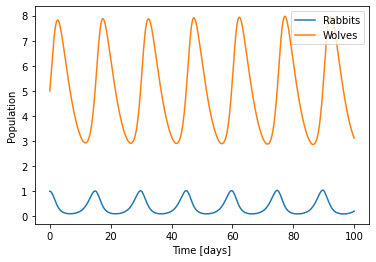

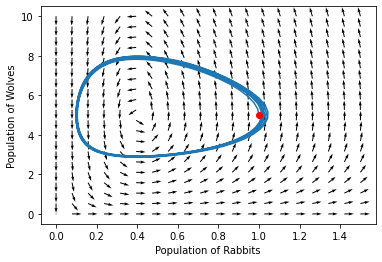

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [1, 5]
t_eval = np.linspace(0,100, 500)

#Solve the differential equation
sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

#Plot the solution vs time
plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
plt.show()

# Plot the phase portrait and grid
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')
plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')

#Plot the phase portrait grid

r = np.linspace(0, 1.5, 20) # rabbit grid
f = np.linspace(0, 10, 20) # wolves grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, wolves) points

DR, DF = diff_eq(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)



What is special about that point in the center?

All of the differential equations are 0; it's a steady state!  First, let's look at this mathematically. This is a nonlinear system, so we have to be careful.

\begin{align}
\vec{y}=\begin{bmatrix}x\\y\end{bmatrix}&& \vec{y}'=\begin{bmatrix}\alpha x-\beta xy\\
\delta xy-\gamma y
 \end{bmatrix}
\end{align}

The steady state is defined by $\vec{y}'=\vec{0}$, so 
\begin{align}
\vec{0}&=\begin{bmatrix}\alpha x-\beta xy\\
\delta xy-\gamma y
 \end{bmatrix}
\end{align} 
or 
\begin{align*}
 0&=\alpha x-\beta xy\\
 0&=\delta xy-\gamma y
\end{align*}

## In-class exercise
Two equations, two unknowns. Take a minute and try to work out the steady state for this system by hand.


Let's work out the steady state solutions

\begin{align*}
x' = 0 = \alpha x -\beta xy = x(\alpha -\beta y)\\
x = 0 \ \text{ or } \ y = \alpha / \beta  \\
y' = 0 = \delta xy - \gamma y = (\delta x - \gamma) y\\
y = 0 \ \text{ or } \ x = \gamma / \delta
\end{align*}

So, there are two possibilities:
\begin{align}
x = 0, \ y = 0 \\
x = \frac{\gamma}{\delta} = 0.4, \ y = \frac{\alpha}{\beta} = 5
\end{align}

What happens if we start the solution at either of these steady states?


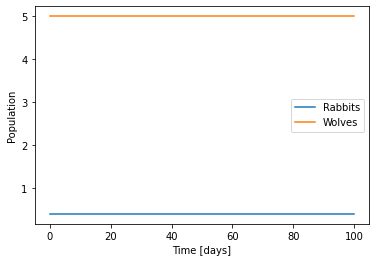

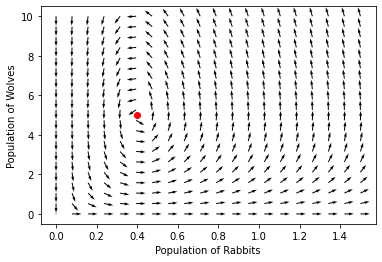

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [0.4, 5]
t_eval = np.linspace(0,100, 500)

#Solve the differential equation
sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

#Plot the solution vs time
plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
plt.show()

# Plot the phase portrait and grid
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')
plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')

#Plot the phase portrait grid

r = np.linspace(0, 1.5, 20) # rabbit grid
f = np.linspace(0, 10, 20) # wolves grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, wolves) points

DR, DF = diff_eq(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)



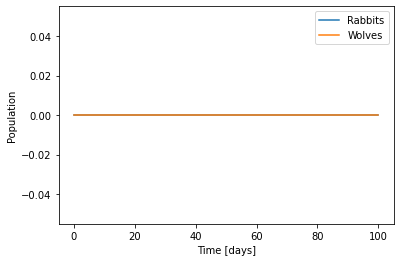

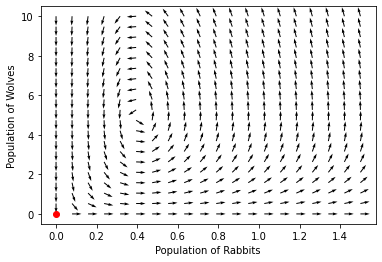

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 100]
initial_population = [0, 0]
t_eval = np.linspace(0,100, 500)

#Solve the differential equation
sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval)

#Plot the solution vs time
plt.plot(sol.t, sol.y.T)
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
plt.show()

# Plot the phase portrait and grid
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')
plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')

#Plot the phase portrait grid

r = np.linspace(0, 1.5, 20) # rabbit grid
f = np.linspace(0, 10, 20) # wolves grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, wolves) points

DR, DF = diff_eq(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)



Perfectly steady!

Now, let's see what happens if we are close the steady state, but not perfect. Try adjusting the initial condition and see how this behaves. 

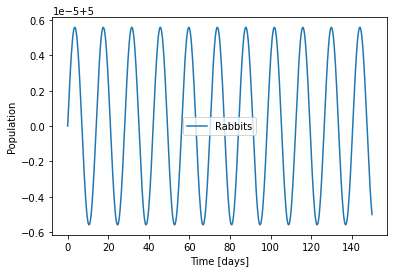

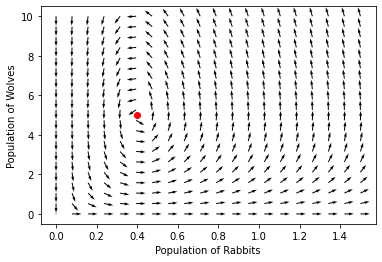

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


t_span = [0, 150]
initial_population = [0.400001, 5]
t_eval = np.linspace(0,150, 500)

#Solve the differential equation
sol = solve_ivp(diff_eq, 
                t_span, 
                initial_population, 
                t_eval=t_eval,
                rtol=1e-10,
                atol=1e-12)

#Plot the solution vs time
plt.plot(sol.t, sol.y.T[:,1])
plt.xlabel('Time [days]')
plt.ylabel('Population')
plt.legend(['Rabbits','Wolves'])
plt.show()

# Plot the phase portrait and grid
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')
plt.xlabel('Population of Rabbits')
plt.ylabel('Population of Wolves')

#Plot the phase portrait grid

r = np.linspace(0, 1.5, 20) # rabbit grid
f = np.linspace(0, 10, 20) # wolves grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, wolves) points

DR, DF = diff_eq(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)



* It's hard to see, but even here we are facing some numerical problems. Try changing the tolerances in your code and see what happens. 

* The only reason I thought this was suspicious because of the analysis I did later to understand how this should behave around the steady state!

Try plotting just the wolf population and try different initial conditions. Notice anything about what the solution looks like? 

## Numerical calculation of steady states

We can use numerical methods to find steady states in our system. This is a specific case of a general problem of finding a vector $\vec{x}$ such that some function 
\begin{align*}
\vec{0}=f(\vec{x})
\end{align*}
where $\vec{0}$ is the same length as $\vec{x}$. These methods work well, but they have a couple downsides:
* They are numerical so you have to be a little wary of solutions due to numerical problems
* You have to provide an initial guess for the steady state
* The method will return one solution, but not every solution. It can not tell you how many possible solutions there are. 

[scipy.optimize.root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html)

The only tricky thing is that we have to change our function.

In [0]:
# We need this to work like fun(x)=0

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]



TypeError: ignored

In [0]:
def myfun(x):
  return 2*x

print(myfun(1))

myfun = lambda x: 2*x # is shorthand for def myfun(x): return x
print(myfun(1))

new_diff_eq = lambda x: diff_eq(0,x)


# example with two inputs
def myfun(x, y):
  return 2*x

myfun = lambda x,y: 2*x # is shorthand for def myfun(x): return x

print(myfun(1, 2))


2
2
2


To read more about lambda functions: [link text](https://)https://www.w3schools.com/python/python_lambda.asp

Ok, now we can use root with our existing diff_eq function!

In [0]:

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return [alpha*x - beta*x*y,
          delta*x*y - gamma*y]


from scipy.optimize import root

solution = root(lambda x: diff_eq(0, x),
     [0.2, 2.5])

solution

    fjac: array([[-0.95835628,  0.28557528],
       [-0.28557528, -0.95835628]])
     fun: array([0., 0.])
 message: 'The solution converged.'
    nfev: 63
     qtf: array([-5.e-324,  5.e-324])
       r: array([-1.18465703, -0.039011  ,  0.16882523])
  status: 1
 success: True
       x: array([0.e+000, 5.e-324])

## Stability of Steady States in Nonlinear Systems


* Steady states defined by
\begin{align}
\vec{y}' = \vec{0}
\end{align}
* For linear homogeneous systems, this is straightforward
\begin{align}
\vec{y}' = \arr{A} \vec{y}\\
\vec{0} = \arr{A}\vec{y} && \rightarrow \text{linear solution}
\end{align}
$\underline{\text{Ex}}$
\begin{align}
y_1' = 2y_2\\
y_2' = -2y_1\\
\arr{A} = \begin{bmatrix} 0 & 2 \\ -2 & 0 \end{bmatrix}
\end{align}
Only solution: $\vec{y}^{ss} = \vec{0}$

<img src="https://docs.google.com/drawings/d/e/2PACX-1vSBzHzl4BSnAI0ulWllpIAJDqS62EprGDZa11WdtV6PKvfEsZ2sLIadZk6CIJJPiSOvSPv3kKtB3Z5E/pub?w=558&h=283">

* There is a steady state, but $\lim_{t \to \infty} \vec{y} \neq \vec{0}$, $\lambda$ are complex. Only steady state by starting it at $\vec{y} = \vec{0}$

## Stability in a 1d system


<img src="https://docs.google.com/drawings/d/e/2PACX-1vTte-Qp-73cn_M3Gkw98h2UEb0HpJJF-oAQ8mLWftg9aCaFFnQ-vCzewDIPqXSOZCBlb7wY05yVdBF9/pub?w=558&h=283">

* Critical points for a function $y' = 0$. Multiple types of critical points depending on $y''$
<img src="https://docs.google.com/drawings/d/e/2PACX-1vTpzCT7XpQ8F7JVmd-YfOJ6rOn-vk6FrWPUcBaRL7gc-qGSsASTyC35t1OR23lLjI3ocje84tB2t98c/pub?w=558&h=283">

Same idea applied for coupled ODE's. Eigenvalues are equivalent for linear system. We're going to come up with Taylor series approximations for $y_1'$ and $y_2'$ that is valid near the steady state. $\vec{y}_{ss}$ See https://en.wikipedia.org/wiki/Taylor_series 
\begin{align}
\vec{y}' &= \begin{bmatrix} y_1' \\ y_2' \end{bmatrix}\\
&= \begin{bmatrix}
y'_{1,ss} + \left.\frac{\partial y_1'}{\partial y_1}\right|_{\vec{y}=\vec{y}_{ss}}(y_1 - y_{1,ss}) + \left.\frac{\partial y_1'}{\partial y_2}\right|_{\vec{y}=\vec{y}_{ss}}(y_2 - y_{2,ss}) + ... \\
y'_{2,ss} + \left.\frac{\partial y_2'}{\partial y_1}\right|_{\vec{y}=\vec{y}_{ss}}(y_1 - y_{1,ss}) + \left.\frac{\partial y_2'}{\partial y_2}\right|_{\vec{y}=\vec{y}_{ss}}(y_2 - y_{2,ss}) + ...
\end{bmatrix}
\end{align}
At the steady state, $\vec{y}' = \begin{bmatrix} y_{1,ss}' \\ y_{2,ss}' \end{bmatrix} = \begin{bmatrix} y_1' \\ y_2' \end{bmatrix}_{y_1=y_{1,ss},\ y_2 = y_{2,ss}} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$\
So,
\begin{align}
\vec{y}' \approx \begin{bmatrix} 
\left.\frac{\partial y_1'}{\partial y_1}\right|_{\vec{y}=\vec{y}_{ss}}(y_1 - y_{1,ss}) + \left.\frac{\partial y_1'}{\partial y_2}\right|_{\vec{y}=\vec{y}_{ss}}(y_2 - y_{2,ss})\\
\left.\frac{\partial y_2'}{\partial y_1}\right|_{\vec{y}=\vec{y}_{ss}}(y_1 - y_{1,ss}) + \left.\frac{\partial y_2'}{\partial y_2}\right|_{\vec{y}=\vec{y}_{ss}}(y_2 - y_{2,ss})
\end{bmatrix}
\vec{y} = \begin{bmatrix} \frac{\partial y_1'}{\partial y_1} & \frac{\partial y_1'}{\partial y_2} \\ \frac{\partial y_2'}{\partial y_1} & \frac{\partial y_2'}{\partial y_2}
\end{bmatrix}_{y_{ss}}
\begin{bmatrix}
y_1 - y_{1,ss} \\ y_2-y_{2,ss}
\end{bmatrix} 
\end{align}
* Call the first matrix the **Jacobian**. The Jacobian is a matrix of all of the possible second derivatives in the problem. 

* This is a linear approximation that holds near a steady state solution.

Define the special matrix, the Jacobian
\begin{align}
J = 
\begin{bmatrix}
\frac{\partial y_1'}{\partial y_1} & \frac{\partial y_1'}{\partial y_2} \\ 
\frac{\partial y_2'}{\partial y_1} & \frac{\partial y_2'}{\partial y_2}
\end{bmatrix}
\end{align}
$\underline{\text{Ex}}$: 
\begin{align}
y_1' &= 2y_2\\
y_2' &= -2y_1
\end{align}
\begin{align}
J = \begin{bmatrix}
\frac{\partial y_1'}{\partial y_1} & \frac{\partial y_1'}{\partial y_2} \\
\frac{\partial y_2'}{\partial y_1} & \frac
{\partial y_2'}{\partial y_2} 
\end{bmatrix}=
\begin{bmatrix} 0 & 2 \\ -2 & 0 \end{bmatrix} && \text{ same as $\arr{A}$!}
\end{align}
* For a linear system, the Jacobian of the ODE is the same as $\arr{A}$
* The linearization of a linear function is just the linear function taylor series of $1 + x = 1 + x$

$\underline{\text{Ex}} 2$: 
\begin{align}
y_1' &= y_1y_2 - y_2 - 6y_1\\
y_2' &= -y_1^2 + y_2
\end{align}
1. Get steady states
\begin{align}
\vec{y}' = 0 \rightarrow y_2 &= y_1^2 \\
0 &= y_1^3 - y_1^2 - 6y_1\\
0 &= y_1(y_1^2 - y_1 - 6)\\
&= y_1(y_1 - 3)(y_1 + 2)
\end{align}
3 solutions: $\vec{y}^{ss} = \begin{bmatrix} 0\\0 \end{bmatrix}, \begin{bmatrix} 3 \\ 9 \end{bmatrix}, \begin{bmatrix} -2 \\ 4 \end{bmatrix}$\
2. Calculate Jacobian:
\begin{align}
J &= 
\begin{bmatrix}
\frac{\partial y_1'}{\partial y_1} & \frac{\partial y_1'}{\partial y_2} \\ 
\frac{\partial y_2'}{\partial y_1} & \frac{\partial y_2'}{\partial y_2}
\end{bmatrix}\\
&= \begin{bmatrix} y_2 - 6 & y_1 - 1 \\
-2y_1 & 1 \end{bmatrix}
\end{align}
The Jacobian tells us about the stability at the steady state.
\begin{align}
J = \begin{bmatrix} y_2 - 6 & y_1 - 1 \\
-2y_1 & 1 \end{bmatrix}
\end{align}
3. Calculate the Jacobian at each steady state. 

* For the first steady state [0,0]
\begin{align}
J|_{0,0} = \begin{bmatrix} -6 & -1 \\ 0 & 1 \end{bmatrix}
\end{align}
Infinitely close to $\vec{y} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, this system is well modeled by $\vec{y}' = \arr{A}\vec{y} = \begin{bmatrix} -6 & -1 \\ 0 & 1 \end{bmatrix} \vec{y}$\
Use our knowledge about stability of steady state systems:
\begin{align}
\lambda_1 &= -6\\
\lambda_2 &= 1 \rightarrow \text{ saddle point}
\end{align}
* For the second steady state [3,9]
\begin{align}
J|_{3,9} = \begin{bmatrix} 3&2\\-6&1 \end{bmatrix}
\end{align}
Infinitely close to $\vec{y} = \begin{bmatrix} 3 \\ 9 \end{bmatrix}$, this system is well modeled by $\vec{y}' = \arr{A}\vec{y} =\begin{bmatrix} 3&2\\-6&1 \end{bmatrix} \vec{y}$\
Let's do this one numerically

In [0]:
import numpy as np
A = [[3,2],
     [-6,1]]

eigval, eigvec = np.linalg.eig(A)
print(eigval)

[2.+3.31662479j 2.-3.31662479j]



Solution for $\vec{y} = \begin{bmatrix} 3 \\ 9 \end{bmatrix}$
\begin{align}
J = \begin{bmatrix} y_2 - 6 & y_1 - 1 \\ -2y_1 & 1 \end{bmatrix} = \begin{bmatrix} 3 & 2 \\ -6 & 1 \end{bmatrix} \\
\vec{y} \approx \begin{bmatrix} 3 & 2 \\ -6 & 1 \end{bmatrix}\vec{y} \ \text{near} \ \begin{bmatrix} 3 \\ 9 \end{bmatrix}\\
\lambda = 2 + 3.3i, 2 - 3.3i && \rightarrow \text{complex, positive real} 
\end{align}
This says the solution will exponentially increase, but oscillate as it does so (like $e^{2t}\cos 3.3t$) (move away from S.S.).

So the eigenvalues for the second steady state are $2+3.3i, 2-3.3i$. 

* One last steady state! [-2, 4]
\begin{align}
J|_{3,9} = \begin{bmatrix} -2 & -3\\ 4 & 1 \end{bmatrix}
\end{align}

Final: $\vec{y}^{ss} = \begin{bmatrix} -2 \\ 4 \end{bmatrix}$
\begin{align}
J = \begin{bmatrix} y_2 - 6 & y_1 - 1 \\ -2y_1 & 1 \end{bmatrix} = \begin{bmatrix} -2 & -3 \\ 4 & 1 \end{bmatrix}\\
\lambda_1 = -\frac{1}{2} + 3.12i, \lambda_2 = -\frac{1}{2} - 3.12i && \rightarrow \text{complex, negative real roots}
\end{align}
Will oscillate but oscillations will decay over time

In [0]:
import numpy as np
A = [[-2,-3],
     [4,1]]

eigval, eigvec = np.linalg.eig(A)
print(eigval)

[-0.5+3.122499j -0.5-3.122499j]


This will oscillate but exponentially decrease, like $e^{-t/2}\cos 3.12t$ . Let's evaluate the solution now. 

## In-class exercise - plot the numerical solution starting from [1,1]

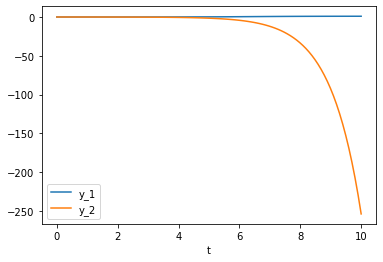

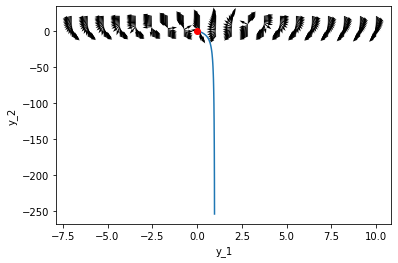

In [0]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt


def diff_eq(t,y): 
  y1, y2 = y

  return [y1*y2-y2-6*y1,
          -y1**2+y2]


t_span = [0, 10]
y0 = [-0.01,-0.01]
t_eval = np.linspace(0,10, 100)

#Solve the differential equation
sol = solve_ivp(diff_eq, 
                t_span, 
                y0, 
                t_eval=t_eval)

#Plot the solution vs time
plt.plot(sol.t, sol.y.T)
plt.xlabel('t')
plt.legend(['y_1','y_2'])
plt.show()

# Plot the phase portrait
plt.plot(sol.y[0,:], sol.y[1,:])
plt.plot(sol.y[0,0:1], sol.y[1,0:1],'or')
plt.xlabel('y_1')
plt.ylabel('y_2')

#Plot the phase portrait grid
r = np.linspace(-7, 10, 20) # y1 grid
f = np.linspace(-7, 20, 20) # y2 grid

R, F = np.meshgrid(r, f) # 2D arrays of (rabbit, wolves) points

DR, DF = diff_eq(0, [R, F])

# This normalizes the arrows so they are all the same length and just show the direction
N = np.sqrt(DR**2 + DF**2)
N[N==0] = 1 # eliminate / 0 errors, it is sort of optional.
DR /= N
DF /= N

plt.quiver(R, F, DR, DF)



Try playing around with differential initial conditions and see how the system behaves. Try adding points for the steady states on the secnod plot.

# Recap: We can't solve nonlinear ODE's but we can say something quantitative about steady state solutions and their stability!

Coupled nonlinear ODE's:
1. Solve for steady solutions ($\vec{y}'=\vec{0}$). Be careful, there may be 0-$\infty$ solutions!
2. Find the Jacobian of the coupled ODE's
3. For each steady state, evaluate Jacobian and calculate eigenvalues
4. Classify stability:
  * If real part of eigenvalues all negative $\rightarrow$ stable steady state
  * If some real parts are positive, probably unstable
  * If complex, may be some oscillations around steady state
  * If only imaginary, stable oscillations

We can solve these numerically as well:
* Use `solve_ivp` to integrate from a set of initial conditions
  * Be careful about tolerances, by default rtol=1e-3, and atol=1e-6
  * Try smaller (rtol=1e-6, atol=1e-8). If the answer changes, you have a problem. Decrease the rtol/atol until your answer no longer changes with those values
* We can find steady states of the system numerically using `root`
  * If you want to use the same differential equation function, you need to use lambda function or similar idea to handle the `t` input.
  * `root` requires an initial guess, and it will yield A solution, not every solution. It is very dependent on the initial guess. There are no guarantees or ways to find all solutions without using special methods from Process Systems Engineering research.

# Return to the wolf/rabbit

Wolf/rabbit example
\begin{align}
x' &= \alpha x -\beta xy && \alpha = 1,\  \beta = 0.2\\
y' &= \delta xy - \gamma y && \delta = 0.5, \ \gamma = 0.2
\end{align}
1. Solve for S.S.
\begin{align}
x' = 0 = \alpha x -\beta xy = x(\alpha -\beta y)\\
x = 0 \ \text{ or } \ y = \alpha / \beta  \\
y' = 0 = \delta xy - \gamma y = (\delta x - \gamma) y\\
y = 0 \ \text{ or } \ x = \gamma / \delta
\end{align}
Two S.S.:
\begin{align}
x = 0, \ y = 0 \\
x = \frac{\gamma}{\delta} = 0.4, \ y = \frac{\alpha}{\beta} = 5
\end{align}
2. Jacobian
\begin{align}
J &=
\begin{bmatrix}
\frac{\partial x'}{\partial x} & \frac{\partial x'}{\partial y} \\ 
\frac{\partial y'}{\partial x} & \frac{\partial y'}{\partial y}
\end{bmatrix}=\begin{bmatrix}\alpha-\beta y&-\beta x\\\delta y&\delta x-\gamma
\end{bmatrix}\\
&= \begin{bmatrix}
1 - 0.2y & -0.2x \\ 0.5y & 0.5x - 0.2
\end{bmatrix}
\end{align}
3. Evaluate Jacobian at each S.S.
\begin{align}
J = \begin{bmatrix}
1 - 0.2y & -0.2x \\ 0.5y & 0.5x - 0.2
\end{bmatrix}
\end{align}
At $x=0, y=0$
\begin{align}
J = \begin{bmatrix}
1 & 0 \\ 0 & -0.2
\end{bmatrix}\\
\lambda = 1, -0.2
\end{align}
Only 1 negative eigenvalue, not stable, unless you approach from a certain direction!
At $x = 0.4, y = 5$:
\begin{align}
J = \begin{bmatrix} 0 & -0.08 \\ 2.5 & 0 \end{bmatrix}\\
\lambda = \pm 0.44 i
\end{align}
Stable oscillations in population of wolf/rabbits

In [0]:
J = [[0,-0.08],
     [2.5,0]]

np.linalg.eig(J)

(array([0.+0.4472136j, 0.-0.4472136j]),
 array([[0.        +0.17609018j, 0.        -0.17609018j],
        [0.98437404+0.j        , 0.98437404-0.j        ]]))

## Numerical estimate of the jacobian

 

First, let's find the steady state again numerically.

In [0]:
from scipy.optimize import root

alpha = 1 # 1/day
beta = 0.2 #1/wolves/day
delta = 0.5 #1/rabbits/day
gamma = 0.2 #1/day

def diff_eq(t,population): 
  # t is independent variable
  # y is a vector of things we want solve_ivp to integrate for
  #  y = [y1, y2]
  #  y = [x,y]
  # return vector the same shape as population/y
    # this will be the differential equation for each thing in population/y

  x,y = population

  return np.array([alpha*x - beta*x*y,
          delta*x*y - gamma*y])

# find a steady state starting from [2, 5]
steady_state = root(lambda x: diff_eq(0, x),
                        [2,5])
print('I guessed %s, and found a steady state %s' % ([2,5],steady_state.x))


I guessed [2, 5], and found a steady state [0.4 5. ]


We can get a numerical estimate of the jacobian, but it requires another package `numdifftools`.

In [0]:
! pip install numdifftools
import numdifftools as nd

jac_fun = nd.Jacobian(lambda x: diff_eq(0, x))
jac = jac_fun(steady_state.x)
np.linalg.eig(jac)

(array([3.92290495e-18+0.4472136j, 3.92290495e-18-0.4472136j]),
 array([[1.54464231e-18+0.17609018j, 1.54464231e-18-0.17609018j],
        [9.84374039e-01+0.j        , 9.84374039e-01-0.j        ]]))

In [0]:
jac

array([[ 7.84580989e-18, -8.00000000e-02],
       [ 2.50000000e+00,  0.00000000e+00]])